# Reproducing the "Where is STEREO Today?" plot

- https://docs.sunpy.org/en/stable/generated/gallery/showcase/where_is_stereo.html

How to reproduce the "Where is STEREO Today?" plot.

This example uses capabilities in sunpy to reproduce the plot that can be found
at https://stereo-ssc.nascom.nasa.gov/where.shtml.

In [ ]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import MultipleLocator

import astropy.units as u
from astropy.coordinates import Longitude

from sunpy.coordinates import HeliocentricEarthEcliptic, get_body_heliographic_stonyhurst, get_horizons_coord
from sunpy.time import parse_time

Define the time for the plot as the time when this script is run.

In [ ]:
# This time is fixed as the ephemeris information for STEREO-B is no longer generated
obstime = parse_time('2024-Oct-17 20:23')

Define a convenience function to extract the first full orbit from a
trajectory, assuming that the trajectory moves in the direction of positive
ecliptic longitude.

In [ ]:
hee_frame = HeliocentricEarthEcliptic(obstime=obstime)


def get_first_orbit(coord):
    lon = coord.transform_to(hee_frame).spherical.lon
    shifted = Longitude(lon - lon[0])
    ends = np.flatnonzero(np.diff(shifted) < 0)
    if ends.size > 0:
        return coord[:ends[0]]
    return coord

Obtain the locations and trajectories of the various planets and spacecraft.
To ensure that each trajectory contains at least one full orbit, we request
700 days for each planet and 1 year for each spacecraft.

In [ ]:
planets = ['Mercury', 'Venus', 'Earth', 'Mars']
times = obstime + np.arange(700) * u.day
planet_coords = {planet: get_first_orbit(get_body_heliographic_stonyhurst(planet, times))
                 for planet in planets}

stereo_a = get_horizons_coord('STEREO-A', obstime)
stereo_b = get_horizons_coord('STEREO-B', obstime)

missions = ['Parker Solar Probe', 'Solar Orbiter', 'BepiColombo']
mission_labels = {'Parker Solar Probe': 'PSP', 'Solar Orbiter': 'SO', 'BepiColombo': 'BEPICOLOMBO'}
mission_coords = {mission: get_first_orbit(get_horizons_coord(mission, {'start': obstime,
                                                                        'stop': obstime + 1 * u.yr,
                                                                        'step': '1d'}))
                  for mission in missions}

INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for STEREO-B (spacecraft) (-235)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for BepiColombo (Spacecraft) (-121) [sunpy.coordinates.ephemeris]


Define a convenience function for converting coordinates to plot positions
in the ecliptic plane.

In [ ]:
def coord_to_heexy(coord):
    coord = coord.transform_to(hee_frame)
    coord.representation_type = 'cartesian'
    return coord.y.to_value('AU'), coord.x.to_value('AU')

Set Matplotlib settings to the desired appearance and initialize the axes.

In [ ]:
mpl.rcParams.update({'figure.facecolor': 'black',
                     'axes.edgecolor': 'white',
                     'axes.facecolor': 'black',
                     'axes.labelcolor': 'white',
                     'axes.titlecolor': 'white',
                     'lines.linewidth': 1,
                     'xtick.color': 'white',
                     'xtick.direction': 'in',
                     'xtick.top': True,
                     'ytick.color': 'white',
                     'ytick.direction': 'in',
                     'ytick.right': True})

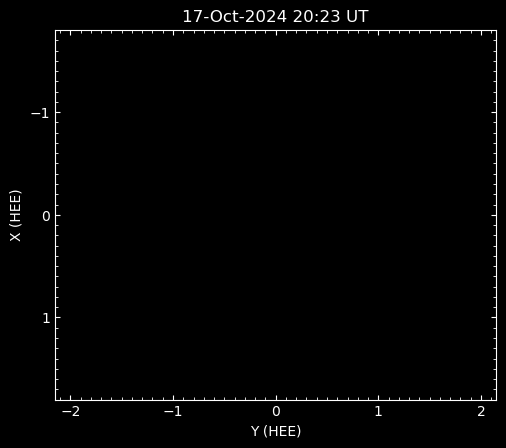

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

#----------------------------------------------------------------
ax.set_xlim(-2.15, 2.15)
ax.set_xlabel('Y (HEE)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(1.8, -1.8)
ax.set_ylabel('X (HEE)')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_title(obstime.strftime('%d-%b-%Y %H:%M UT'))
ax.set_aspect('equal')
#----------------------------------------------------------------

plt.show()

Draw the Sun-Earth line.

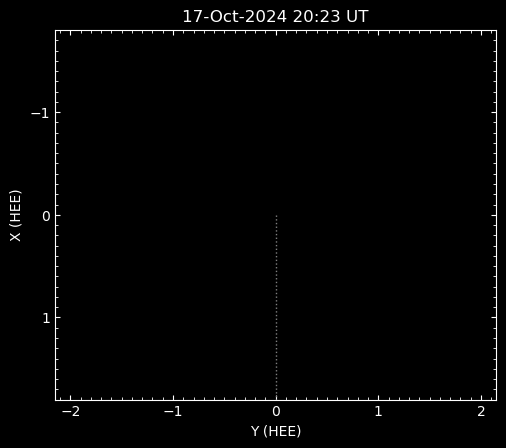

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

#----------------------------------------------------------------
ax.set_xlim(-2.15, 2.15)
ax.set_xlabel('Y (HEE)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(1.8, -1.8)
ax.set_ylabel('X (HEE)')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_title(obstime.strftime('%d-%b-%Y %H:%M UT'))
ax.set_aspect('equal')
#----------------------------------------------------------------
ax.plot([0, 0], [0, 2], linestyle='dotted', color='gray')
#----------------------------------------------------------------

plt.show()

Draw Mercury, Venus, Earth, and Mars, with Earth formatted differently.

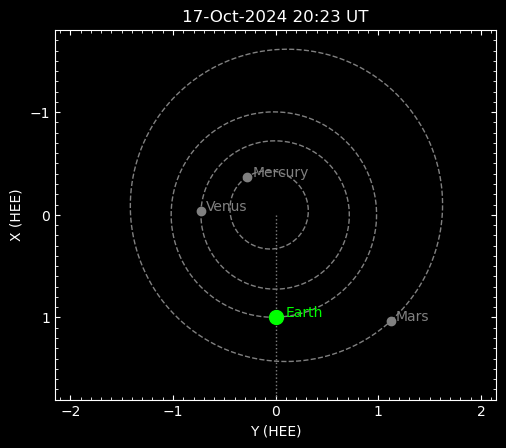

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

#----------------------------------------------------------------
ax.set_xlim(-2.15, 2.15)
ax.set_xlabel('Y (HEE)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(1.8, -1.8)
ax.set_ylabel('X (HEE)')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_title(obstime.strftime('%d-%b-%Y %H:%M UT'))
ax.set_aspect('equal')
#----------------------------------------------------------------
ax.plot([0, 0], [0, 2], linestyle='dotted', color='gray')
#----------------------------------------------------------------
for planet, coord in planet_coords.items():
    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color='gray')

    if planet == 'Earth':
        color, markersize, offset = 'lime', 10, 0.1
    else:
        color, markersize, offset = 'gray', None, 0.05

    x, y = coord_to_heexy(coord[0])
    ax.plot(x, y, 'o', markersize=markersize, color=color)
    ax.text(x + offset, y, planet, color=color)
#----------------------------------------------------------------
    
plt.show()

Draw the STEREO spacecraft (without orbits), as well as Sun-STEREO lines.

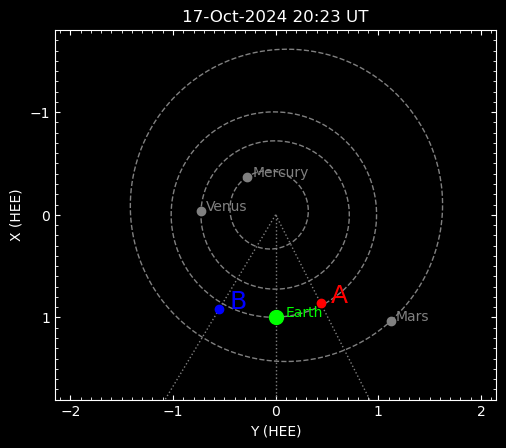

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

#----------------------------------------------------------------
ax.set_xlim(-2.15, 2.15)
ax.set_xlabel('Y (HEE)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(1.8, -1.8)
ax.set_ylabel('X (HEE)')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_title(obstime.strftime('%d-%b-%Y %H:%M UT'))
ax.set_aspect('equal')
#----------------------------------------------------------------
ax.plot([0, 0], [0, 2], linestyle='dotted', color='gray')
#----------------------------------------------------------------
for planet, coord in planet_coords.items():
    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color='gray')

    if planet == 'Earth':
        color, markersize, offset = 'lime', 10, 0.1
    else:
        color, markersize, offset = 'gray', None, 0.05

    x, y = coord_to_heexy(coord[0])
    ax.plot(x, y, 'o', markersize=markersize, color=color)
    ax.text(x + offset, y, planet, color=color)
#----------------------------------------------------------------
for stereo, label, color in [(stereo_a, 'A', 'red'), (stereo_b, 'B', 'blue')]:
    x, y = coord_to_heexy(stereo)
    ax.plot([0, 5*x], [0, 5*y], linestyle='dotted', color='gray')
    ax.plot(x, y, 'o', color=color)
    ax.text(x + 0.1, y, label, color=color, fontsize=18)
#----------------------------------------------------------------

plt.show()

Draw the Sun, which is at the origin by definition.

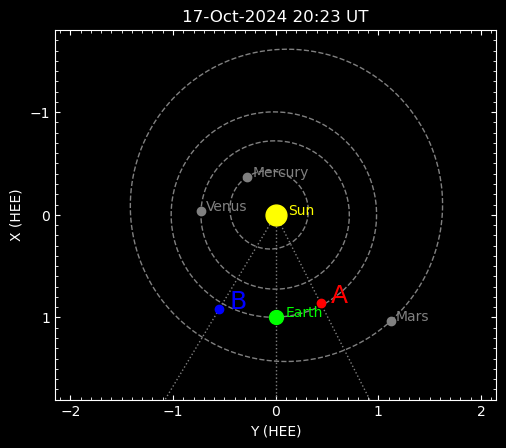

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

#----------------------------------------------------------------
ax.set_xlim(-2.15, 2.15)
ax.set_xlabel('Y (HEE)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(1.8, -1.8)
ax.set_ylabel('X (HEE)')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_title(obstime.strftime('%d-%b-%Y %H:%M UT'))
ax.set_aspect('equal')
#----------------------------------------------------------------
ax.plot([0, 0], [0, 2], linestyle='dotted', color='gray')
#----------------------------------------------------------------
for planet, coord in planet_coords.items():
    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color='gray')

    if planet == 'Earth':
        color, markersize, offset = 'lime', 10, 0.1
    else:
        color, markersize, offset = 'gray', None, 0.05

    x, y = coord_to_heexy(coord[0])
    ax.plot(x, y, 'o', markersize=markersize, color=color)
    ax.text(x + offset, y, planet, color=color)
#----------------------------------------------------------------
for stereo, label, color in [(stereo_a, 'A', 'red'), (stereo_b, 'B', 'blue')]:
    x, y = coord_to_heexy(stereo)
    ax.plot([0, 5*x], [0, 5*y], linestyle='dotted', color='gray')
    ax.plot(x, y, 'o', color=color)
    ax.text(x + 0.1, y, label, color=color, fontsize=18)
#----------------------------------------------------------------
ax.plot(0, 0, 'o', markersize=15, color='yellow')
ax.text(0.12, 0, 'Sun', color='yellow')
#----------------------------------------------------------------

plt.show()

Finally, draw the various spacecraft, with Solar Orbiter colored differently.

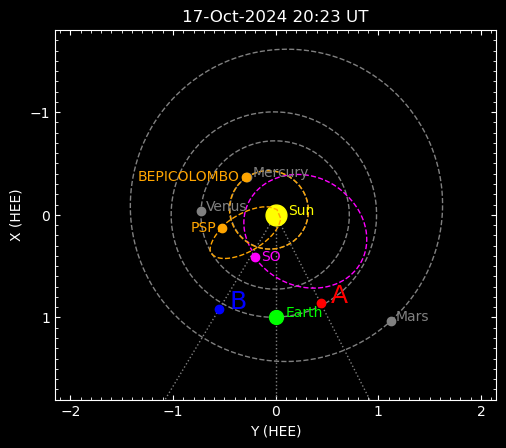

In [ ]:
fig = plt.figure()
ax = fig.add_subplot()

#----------------------------------------------------------------
ax.set_xlim(-2.15, 2.15)
ax.set_xlabel('Y (HEE)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(1.8, -1.8)
ax.set_ylabel('X (HEE)')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_title(obstime.strftime('%d-%b-%Y %H:%M UT'))
ax.set_aspect('equal')
#----------------------------------------------------------------
ax.plot([0, 0], [0, 2], linestyle='dotted', color='gray')
#----------------------------------------------------------------
for planet, coord in planet_coords.items():
    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color='gray')

    if planet == 'Earth':
        color, markersize, offset = 'lime', 10, 0.1
    else:
        color, markersize, offset = 'gray', None, 0.05

    x, y = coord_to_heexy(coord[0])
    ax.plot(x, y, 'o', markersize=markersize, color=color)
    ax.text(x + offset, y, planet, color=color)
#----------------------------------------------------------------
for stereo, label, color in [(stereo_a, 'A', 'red'), (stereo_b, 'B', 'blue')]:
    x, y = coord_to_heexy(stereo)
    ax.plot([0, 5*x], [0, 5*y], linestyle='dotted', color='gray')
    ax.plot(x, y, 'o', color=color)
    ax.text(x + 0.1, y, label, color=color, fontsize=18)
#----------------------------------------------------------------
ax.plot(0, 0, 'o', markersize=15, color='yellow')
ax.text(0.12, 0, 'Sun', color='yellow')
#----------------------------------------------------------------
for mission, coord in mission_coords.items():
    color = 'magenta' if mission == 'Solar Orbiter' else 'orange'

    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color=color)

    if mission == 'Solar Orbiter':
        color, offset_x, offset_y = 'magenta', 0.06, 0.03
    elif mission == 'BepiColombo':
        color, offset_x, offset_y = 'orange', -1.06, 0.03
    elif mission == 'Parker Solar Probe':
        color, offset_x, offset_y = 'orange', -0.3, 0.04

    x, y = coord_to_heexy(coord[0])
    ax.plot(x, y, 'o', color=color)
    ax.text(x + offset_x, y + offset_y, mission_labels[mission], color=color)
#----------------------------------------------------------------

plt.show()

INFO: Obtained JPL HORIZONS location for STEREO-A (spacecraft) (-234)    [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Parker Solar Probe (spacecraft) (-96) [sunpy.coordinates.ephemeris]
INFO: Obtained JPL HORIZONS location for Solar Orbiter (spacecraft) (-144) [sunpy.coordinates.ephemeris]


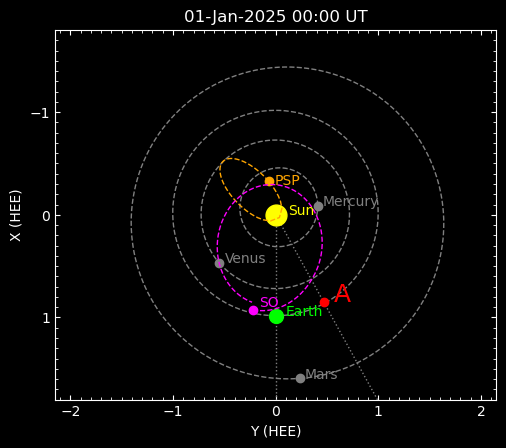

In [ ]:
obstime = parse_time('2025-Jan-01 00:00')

hee_frame = HeliocentricEarthEcliptic(obstime=obstime)

planets = ['Mercury', 'Venus', 'Earth', 'Mars']
times = obstime + np.arange(700) * u.day
planet_coords = {planet: get_first_orbit(get_body_heliographic_stonyhurst(planet, times))
                 for planet in planets}

stereo_a = get_horizons_coord('STEREO-A', obstime)

missions = ['Parker Solar Probe', 'Solar Orbiter']
mission_labels = {'Parker Solar Probe': 'PSP', 'Solar Orbiter': 'SO'}
mission_coords = {mission: get_first_orbit(get_horizons_coord(mission, {'start': obstime,
                                                                        'stop': obstime + 1 * u.yr,
                                                                        'step': '1d'}))
                  for mission in missions}

fig = plt.figure()
ax = fig.add_subplot()

#----------------------------------------------------------------
ax.set_xlim(-2.15, 2.15)
ax.set_xlabel('Y (HEE)')
ax.xaxis.set_major_locator(MultipleLocator(1))
ax.xaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_ylim(1.8, -1.8)
ax.set_ylabel('X (HEE)')
ax.yaxis.set_major_locator(MultipleLocator(1))
ax.yaxis.set_minor_locator(MultipleLocator(0.1))

ax.set_title(obstime.strftime('%d-%b-%Y %H:%M UT'))
ax.set_aspect('equal')
#----------------------------------------------------------------
ax.plot([0, 0], [0, 2], linestyle='dotted', color='gray')
#----------------------------------------------------------------
for planet, coord in planet_coords.items():
    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color='gray')

    if planet == 'Earth':
        color, markersize, offset = 'lime', 10, 0.1
    else:
        color, markersize, offset = 'gray', None, 0.05

    x, y = coord_to_heexy(coord[0])
    ax.plot(x, y, 'o', markersize=markersize, color=color)
    ax.text(x + offset, y, planet, color=color)
#----------------------------------------------------------------
x, y = coord_to_heexy(stereo_a)
ax.plot([0, 5*x], [0, 5*y], linestyle='dotted', color='gray')
ax.plot(x, y, 'o', color='red')
ax.text(x + 0.1, y, 'A', color='red', fontsize=18)
#----------------------------------------------------------------
ax.plot(0, 0, 'o', markersize=15, color='yellow')
ax.text(0.12, 0, 'Sun', color='yellow')
#----------------------------------------------------------------
for mission, coord in mission_coords.items():
    color = 'magenta' if mission == 'Solar Orbiter' else 'orange'

    ax.plot(*coord_to_heexy(coord), linestyle='dashed', color=color)

    if mission == 'Solar Orbiter':
        color, offset_x, offset_y = 'magenta', 0.06, -0.03
    elif mission == 'Parker Solar Probe':
        color, offset_x, offset_y = 'orange', 0.06, 0.03

    x, y = coord_to_heexy(coord[0])
    ax.plot(x, y, 'o', color=color)
    ax.text(x + offset_x, y + offset_y, mission_labels[mission], color=color)
#----------------------------------------------------------------

plt.show()

**Positions of STEREO A for 1-Jan-2025 00:00 UT**

![](where_is_stereo.gif)